In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#analyse numeric data
train.describe()

/home/srik/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#observation
O) When the mean and median are different, then the data is skewed.

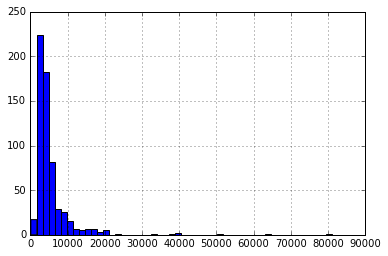

In [9]:
#distribution analysis
train.ApplicantIncome.hist(bins=50)

/home/srik/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f3fad54ac90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3fad54ca50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fad534d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fad534710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3fad631690>,
  <matplotlib.lines.Line2D at 0x7f3fad54c510>]}

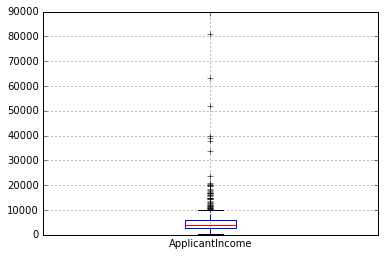

In [11]:
train.boxplot(column='ApplicantIncome')

Lots of outliers, says income disparity in society, we shall study relation with education

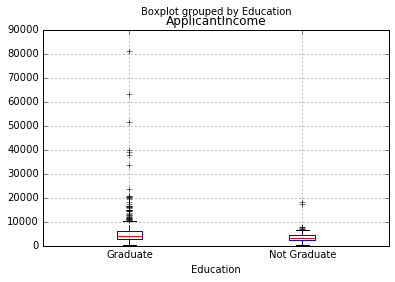

In [12]:
train.boxplot(column='ApplicantIncome', by='Education')

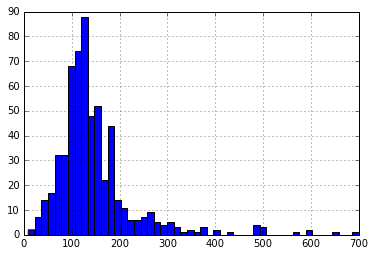

In [13]:
#loan amount
train.LoanAmount.hist(bins=50)

/home/srik/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f3fad1bf4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3fad1cf290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fad15a590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3fad1cff10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3fad292fd0>,
  <matplotlib.lines.Line2D at 0x7f3fad1bfc10>]}

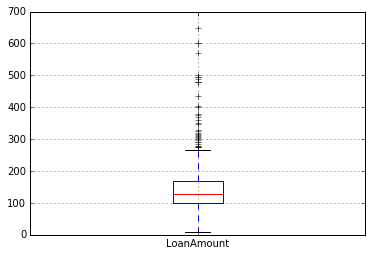

In [14]:
train.boxplot(column='LoanAmount')

In [9]:
#Object vars:for categorical variables, find the num of unique variables
categorical_vars = train.dtypes.loc[train.dtypes=='object'].index
#train.select_dtypes(include=['object']).columns

In [24]:
#type(categorical_vars)
#find the number of unique values in each category
#[len(train[x].unique()) for x in categorical_vars]
train[categorical_vars].apply(lambda x:len(x.unique()))

Loan_ID          614
Gender             3
Married            3
Dependents         5
Education          2
Self_Employed      3
Property_Area      3
Loan_Status        2
dtype: int64

In [36]:
#As the num of unique values is less than 10, no need of combining any categorical vars
#train[categorical_vars[1:]].apply(lambda x:x.unique())
#check to see if there are any redundant unique values among all categories(like y and yes)
train.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [22]:
#multivariate analysis
#1) both categorical vars - use crosstabulation
ct = pd.crosstab(train.Credit_History, train.Loan_Status, margins = True)

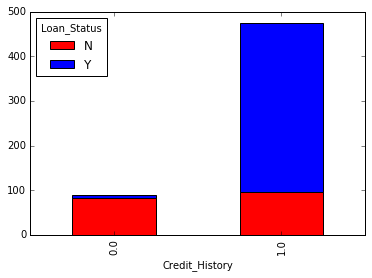

In [23]:
ct.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color=['red', 'blue'], grid=False)

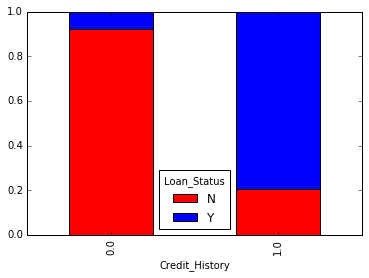

In [25]:
#in terms of percentage
def percConverter(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(percConverter, axis=1)
ct2.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color=['red', 'blue'], grid=False)

In [7]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
#classification considering credit history alone
def cond(i):
    th0 = 0.92
    th1 = 0.2
    if i == 0:
        if np.random.rand() > th0:
            return 1
        else:
            return 0
    else:
        if np.random.rand() > th1:
            return 1
        else:
            return 0
 
train_pred = [cond(i) for i in train.Credit_History]
test_pred = [cond(i) for i in test.Credit_History]
#train_pred = str(train_pred)

In [14]:
submission = pd.read_csv('Sample_Submission.csv')
submission.Loan_ID = test.Loan_ID
submission.Loan_Status
#loan_status = ['Y']*len(test.Loan_ID)
loan_status = ['N' if test_pred[i]==0 else 'Y' for i in range(len(test_pred))]
submission.Loan_Status = loan_status
submission.to_csv('submission1.csv', index=False)

In [26]:
#compute crosstabulation by considering both the columns gender and credit history
ct = pd.crosstab([train.Gender, train.Credit_History], train.Loan_Status, margins = True)
print ct

Loan_Status              N    Y  All
Gender Credit_History               
Female 0.0              16    1   17
       1.0              20   64   84
Male   0.0              63    6   69
       1.0              75  307  382
All                    174  378  552


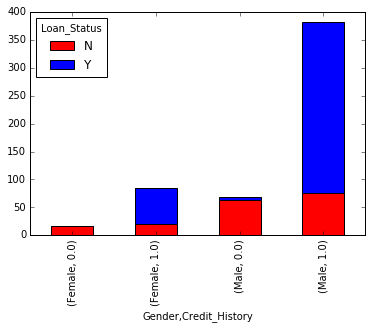

In [27]:
ct.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color=['red', 'blue'], grid=False)

In [28]:
#says to submit based on the above two classification algorithms
#######to do

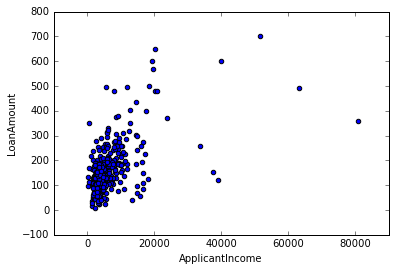

In [57]:
#both continuous scatter plot
train.plot('ApplicantIncome', 'LoanAmount', kind='scatter')
#train.Credit_History

In [64]:
#cont vs categorical
#train.boxplot(column='ApplicantIncome', by='Gender')
#check for missing values
train.isnull().sum()
#test.isnull().sum()
#train.apply(lambda x:sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
#train.Gender.value_counts().index[0]
train.LoanAmount.describe()

/home/srik/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%             NaN
50%             NaN
75%             NaN
max      700.000000
Name: LoanAmount, dtype: float64

In [13]:
#missing values in categorical vars
Vars_to_impute = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
train.update(train[Vars_to_impute].apply(lambda x:x.fillna(x.value_counts().index[0])))#.isnull().sum()
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test.update(test[Vars_to_impute].apply(lambda x:x.fillna(x.value_counts().index[0])))
#or this can be done using mode
#from scipy.stats import mode
#for var in Vars_to_impute:
    #train[var].fillna(mode(train[var]).mode[0], inplace=True)
    #test[var].fillna(mode(test[var]).mode[0], inplace=True)
#train.apply(lambda x:sum(x.isnull()))

In [15]:
#working with missing numeric values
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)
#train.LoanAmount.value_counts()

In [16]:
#data processing for sklearn to handle
#object variable transformation to numeric
from sklearn.preprocessing import LabelEncoder
cat_vars = train.dtypes.loc[train.dtypes=='object'].index
test_catVars = cat_vars[:-1]
le = LabelEncoder()
for cat in cat_vars:
    train[cat] = le.fit_transform(train[cat])
for cat in test_catVars:
    test[cat] = le.fit_transform(test[cat])
train.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [17]:
from sklearn.tree import DecisionTreeClassifier
dependent_var = 'Loan_Status'
independent_var = [x for x in train.columns if x not in ['Loan_ID', 'Loan_Status']]

In [24]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
#Intialize the alg
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, max_features='sqrt')
model.fit(train[independent_var], train[dependent_var])

predictions_train = model.predict(train[independent_var])
print type(predictions_train)
prediction_test = model.predict(test[independent_var])

#analyze results
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train[dependent_var], predictions_train)

<type 'numpy.ndarray'>


In [42]:
#acc_train
#accuracy_score(train[dependent_var], train_pred)
#len(train[dependent_var])
#len(train_pred)
type(train[dependent_var])
#type(train_pred)
#sum = 0
#[sum+1 if i==train_pred[j] else sum+0 for i, j in zip(train[dependent_var], range(len(train_pred)))]
#train_pred[0]
#train[dependent_var].iloc[0]

pandas.core.series.Series